# 2D model and eigenvalue visualization based on matplotlib

In [1]:
import opstool as opst
import openseespy.opensees as ops

## 2D Frame Model

In [11]:
ops.wipe()
ops.model('BasicBuilder', '-ndm', 2, '-ndf', 3)
ops.node(1, 0.0, 0.0)
ops.node(2, 360.0, 0.0)
ops.node(3, 720.0, 0.0)
ops.node(4, 1080.0, 0.0)
ops.node(5, 0.0, 162.0, '-mass', 0.766692546583851, 0.766692546583851, 0.0)
ops.node(6, 360.0, 162.0, '-mass', 0.766692546583851, 0.766692546583851, 0.0)
ops.node(7, 720.0, 162.0, '-mass', 0.766692546583851, 0.766692546583851, 0.0)
ops.node(8, 1080.0, 162.0, '-mass', 0.766692546583851, 0.766692546583851, 0.0)
ops.node(9, 0.0, 324.0, '-mass', 0.766692546583851, 0.766692546583851, 0.0)
ops.node(10, 360.0, 324.0, '-mass', 0.766692546583851, 0.766692546583851, 0.0)
ops.node(11, 720.0, 324.0, '-mass', 0.766692546583851, 0.766692546583851, 0.0)
ops.node(12, 1080.0, 324.0, '-mass', 0.766692546583851, 0.766692546583851, 0.0)
ops.node(13, 0.0, 486.0, '-mass', 0.6275879917184265, 0.6275879917184265, 0.0)
ops.node(14, 360.0, 486.0, '-mass', 0.6275879917184265, 0.6275879917184265, 0.0)
ops.node(15, 720.0, 486.0, '-mass', 0.6275879917184265, 0.6275879917184265, 0.0)
ops.node(16, 1080.0, 486.0, '-mass', 0.6275879917184265, 0.6275879917184265, 0.0)
ops.fix(1, 1, 1, 1)
ops.fix(2, 1, 1, 1)
ops.fix(3, 1, 1, 1)
ops.fix(4, 1, 1, 1)
ops.geomTransf('Linear', 1)
ops.geomTransf('PDelta', 2)
ops.element('elasticBeamColumn', 1, 1, 5, 75, 29000, 3400, 2)
ops.element('elasticBeamColumn', 2, 5, 9, 75, 29000, 3400, 2)
ops.element('elasticBeamColumn', 3, 9, 13, 75, 29000, 3400, 2)
ops.element('elasticBeamColumn', 4, 2, 6, 91, 29000, 4330, 2)
ops.element('elasticBeamColumn', 5, 6, 10, 91, 29000, 4330, 2)
ops.element('elasticBeamColumn', 6, 10, 14, 91, 29000, 4330, 2)
ops.element('elasticBeamColumn', 7, 3, 7, 91, 29000, 4330, 2)
ops.element('elasticBeamColumn', 8, 7, 11, 91, 29000, 4330, 2)
ops.element('elasticBeamColumn', 9, 11, 15, 91, 29000, 4330, 2)
ops.element('elasticBeamColumn', 10, 4, 8, 75, 29000, 3400, 2)
ops.element('elasticBeamColumn', 11, 8, 12, 75, 29000, 3400, 2)
ops.element('elasticBeamColumn', 12, 12, 16, 75, 29000, 3400, 2)
ops.element('elasticBeamColumn', 13, 5, 6, 34, 29000, 5900, 1)
ops.element('elasticBeamColumn', 14, 6, 7, 34, 29000, 5900, 1)
ops.element('elasticBeamColumn', 15, 7, 8, 34, 29000, 5900, 1)
ops.element('elasticBeamColumn', 16, 9, 10, 34, 29000, 4930, 1)
ops.element('elasticBeamColumn', 17, 10, 11, 34, 29000, 4930, 1)
ops.element('elasticBeamColumn', 18, 11, 12, 34, 29000, 4930, 1)
ops.element('elasticBeamColumn', 19, 13, 14, 20, 29000, 1830, 1)
ops.element('elasticBeamColumn', 20, 14, 15, 20, 29000, 1830, 1)
ops.element('elasticBeamColumn', 21, 15, 16, 20, 29000, 1830, 1)
# loads
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)
ops.load(5, 0.5, 0.0, 0.0) # ==ndf
ops.load(9, 0.75, 0.0, 0.0) # ==ndf
ops.load(13, 1.0, 0.0, 0.0) # ==ndf
ops.eleLoad('-ele', 13, 14, 15, '-type', '-beamUniform', -1.0972222222222223)
ops.eleLoad('-ele', 16, 17, 18, '-type', '-beamUniform', -1.0972222222222223)
ops.eleLoad('-ele', 19, 20, 21, '-type', '-beamUniform', -0.8981481481481481)

Model data saved in opstool_output/ModelData.hdf5!

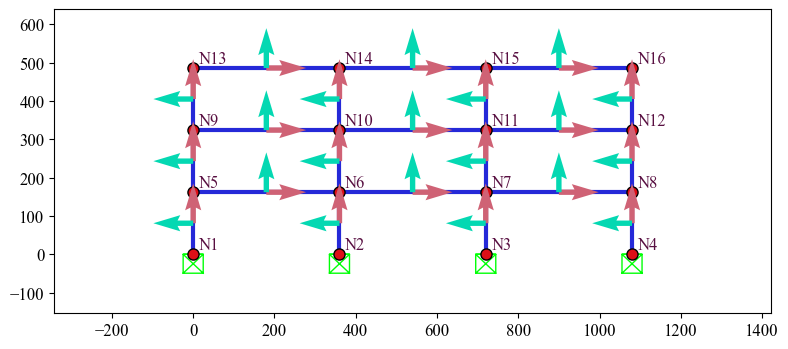

In [3]:
opst.plot_model(backend="mpl", point_size=8,
                show_node_label=True, label_size=12,
               show_local_crd=True)

Model data saved in opstool_output/ModelData.hdf5!

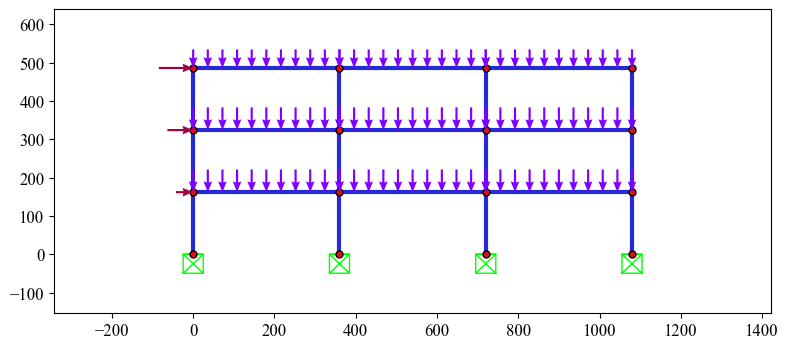

In [4]:
opst.plot_model(backend="mpl", point_size=5, show_load=True, load_alpha=1.2)

Eigen data saved in opstool_output/EigenData.hdf5!

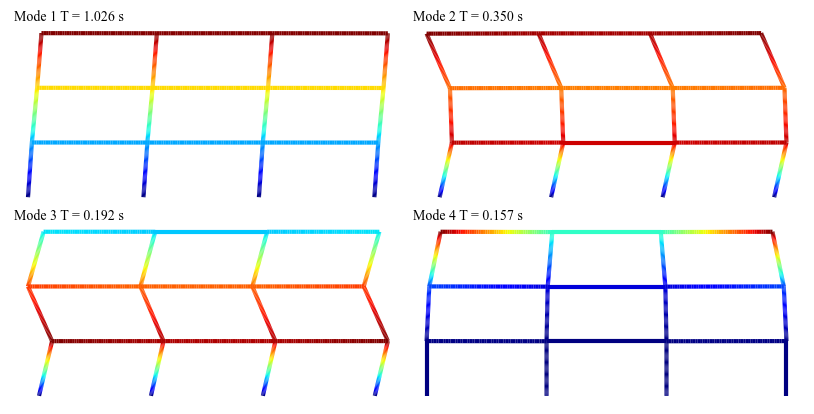

In [12]:
opst.plot_eigen(mode_tags=[1, 4], backend="mpl", subplots=True)

## 2D Solid Model

In [14]:
ops.wipe()
ops.model('BasicBuilder', '-ndm', 2, '-ndf', 2)
ops.nDMaterial('ElasticIsotropic', 1, 1000, 0.25, 3.0)
crds = [1, 0, 0, 2, 40, 0, 3, 40, 10, 4, 0, 10]
ops.block2D(16, 4, 1, 1, 'quad', 1, 'PlaneStress2D', 1, *crds)
ops.fix(1, 1, 1)
ops.fix(9, 0, 1)
# load
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1, '-fact', 1.0)
ops.load(18, 0.25, 0.0)
ops.load(35, 0.5, 0.0)
ops.load(52, 0.75, 0.0)
ops.load(69, 1.0, 0.0)
for tag in range(69, 86):
    ops.load(tag, 0.0, -1.0)   # ==ndf 

Model data saved in opstool_output/ModelData.hdf5!

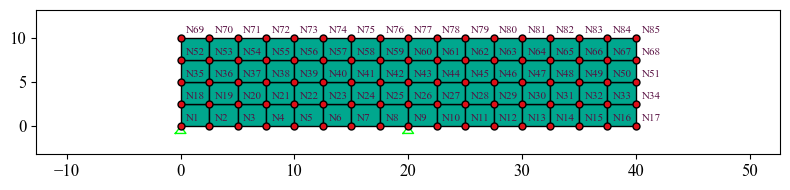

In [7]:
opst.plot_model(backend="mpl", point_size=5, show_node_label=True)

Model data saved in opstool_output/ModelData.hdf5!

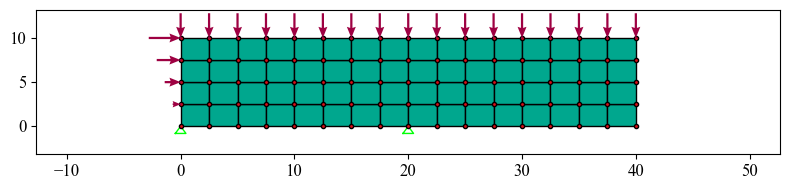

In [15]:
opst.plot_model(backend="mpl", point_size=3, show_load=True, load_alpha=1.2)

Eigen data saved in opstool_output/EigenData.hdf5!

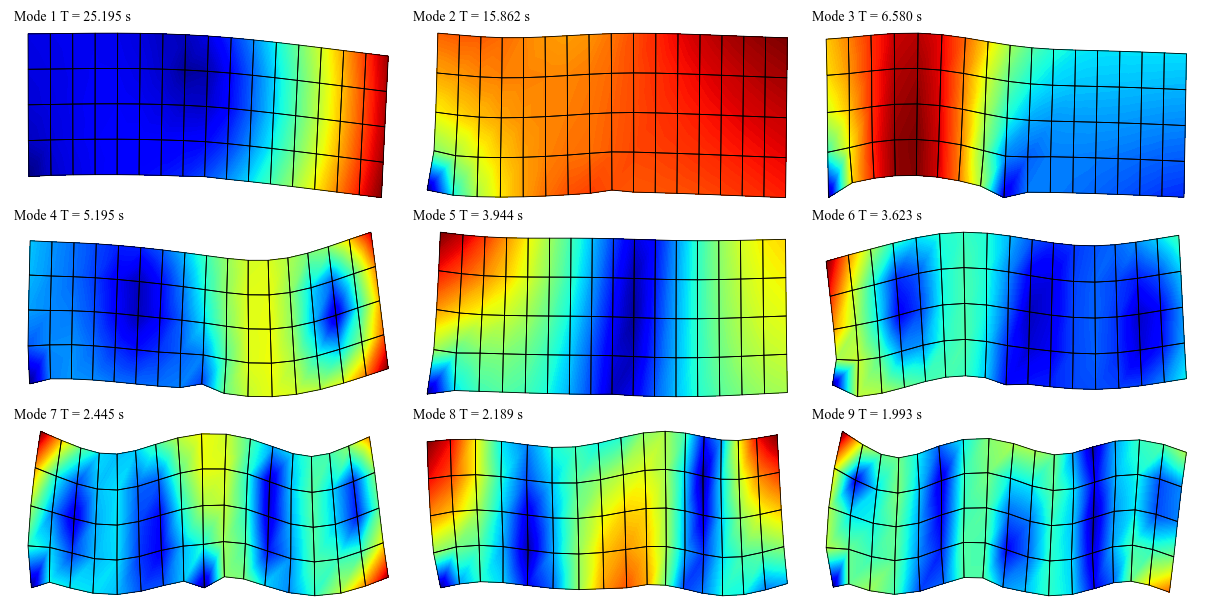

In [9]:
opst.plot_eigen(mode_tags=[1,9], backend="mpl", subplots=True)